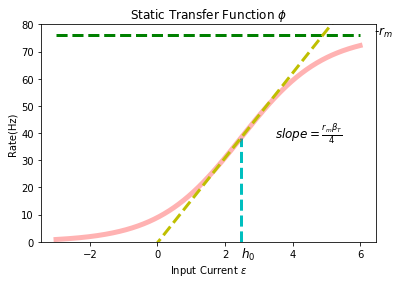

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
phi=np.zeros(900)
count=0
for xi in np.arange(-3,6,0.01):
    phi[count]=r_m/(1+np.exp(-beta_T*(xi-h_0)))
    count=count+1
plt.figure()
plt.title("Static Transfer Function $\phi$")
plt.xlabel("Input Current $\epsilon$")
plt.ylabel("Rate(Hz)")
plt.ylim([0,80])
#plt.plot(np.arange(-3,6,0.01),phi_i)
plt.plot(np.arange(-3,6,0.01),phi,'-r',linewidth=5,alpha=0.3)
plt.vlines(h_0, 0,phi[int((h_0+3)/0.01)], colors = "c", linestyles = "dashed",linewidth=3)
plt.hlines(r_m,-3,6,colors='g',linestyles = "dashed",linewidth=3)
plt.text(6.4,r_m,'-$r_m$',size='12')
plt.text(h_0,-6,'$h_0$',size='12')
y_line=np.zeros(900)
count=0
slope=r_m*beta_T/4
for xi in np.arange(-3,6,0.01):
    y_line[count]=slope*xi-h_0*slope+phi[int((h_0+3)/0.01)]
    count=count+1
plt.plot(np.arange(-3,6,0.01),y_line,'--y',linewidth=3)
plt.text(h_0+1,phi[int((h_0+3)/0.01)],r'$slope=\frac{r_m \beta_T}{4}$',size='12')
plt.savefig('Figures/phi.png')

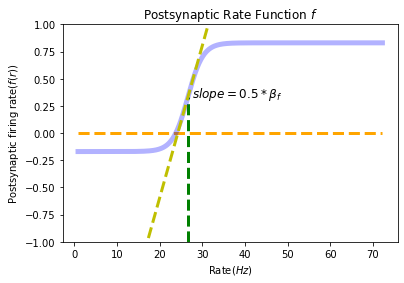

In [2]:
c=0.005
N=50000
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
f=np.zeros(900)
r=np.zeros(900)
count=0
for xi in np.arange(-3,6,0.01):
    r[count]=r_m/(1+np.exp(-beta_T*(xi-h_0)))
    f[count]=0.5*(2*q_f-1+np.tanh(beta_f*(r[count]-x_f)))
    count=count+1
plt.figure()
plt.title('Postsynaptic Rate Function $f$')
plt.xlabel('Rate($Hz$)')
plt.ylabel('Postsynaptic firing rate($f(r)$)')
plt.ylim(-1,1)
plt.plot(r,f,'-b',linewidth=5,alpha=0.3)
plt.hlines(0,r[0],r[899],colors="orange",linestyles="dashed",linewidth=3)
plt.vlines(x_f,-1,(0.5*(2*q_f-1)),colors="g",linestyles="dashed",linewidth=3)
f_line=np.zeros(900)
f_slope=0.5*beta_f
for count in range(900):
    f_line[count]=f_slope*(r[count]-x_f)+0.5*(2*q_f-1)
plt.plot(r,f_line,'--y',linewidth=3)
plt.text(x_f+1,(0.5*(2*q_f-1)),r'$slope=0.5*\beta_f$',size='12')
plt.savefig('Figures/f.png')

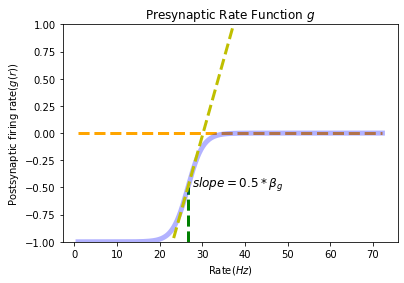

In [3]:
q_g=0
beta_g=beta_f
x_g=x_f
count=0
g=np.zeros(900)
for xi in np.arange(-3,6,0.01):
    g[count]=0.5*(2*q_g-1+np.tanh(beta_g*(r[count]-x_g)))
    count=count+1
plt.figure()
plt.title('Presynaptic Rate Function $g$')
plt.xlabel('Rate($Hz$)')
plt.ylabel('Postsynaptic firing rate($g(r)$)')
plt.ylim(-1,1)
plt.plot(r,g,'-b',linewidth=5,alpha=0.3)
plt.hlines(0,r[0],r[899],colors="orange",linestyles="dashed",linewidth=3)
plt.vlines(x_f,-1,(0.5*(2*q_g-1)),colors="g",linestyles="dashed",linewidth=3)
g_line=np.zeros(900)
g_slope=0.5*beta_f
for count in range(900):
    g_line[count]=g_slope*(r[count]-x_g)+0.5*(2*q_g-1)
plt.plot(r,g_line,'--y',linewidth=3)
plt.text(x_g+1,(0.5*(2*q_g-1)),r'$slope=0.5*\beta_g$',size='12')
plt.savefig('Figures/g.png')

In [6]:
# Structral connectivity matrix
p=1
######
N=5000
######

#Firing rate pattern
xi_pattern=np.random.normal(0,1,size=(p,N))
r_pattern=r_m/(1+np.exp(-beta_T*(xi_pattern-h_0)))
print(r_pattern)
C=np.zeros((N,N),dtype='int8')
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<0.05:
            C[i,j]=1

[[15.41120762 10.54681732 21.76020853 ...  4.90392846 12.55308827
   3.37299122]]


In [31]:
#Final connectivity matrix J
J=np.zeros((N,N))
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
#equation 2
#for i in range(N):
#    for j in range(N):
#        Sum=0
#        for k in range(p):
#            Sum=Sum+f(r_pattern[k,i])*g(r_pattern[k,j])
#        if random.uniform(0,1)<0.05:
#            J[i,j]=A/c/N*Sum
Sum=np.zeros((N,N))
for k in range(p):
    Sum=Sum+np.dot(f(np.transpose(r_pattern[k])).reshape(N,1),g(r_pattern[k]).reshape(1,N))
J=A*C/c/N*Sum

[[0.16778442 0.16808231 0.15761879 ... 0.16810238 0.16803883 0.16810289]
 [0.16955313 0.16985416 0.15928033 ... 0.16987444 0.16981022 0.16987496]
 [0.10742657 0.1076173  0.10091786 ... 0.10763014 0.10758946 0.10763047]
 ...
 [0.16967228 0.16997352 0.15939226 ... 0.16999381 0.16992955 0.16999433]
 [0.16929497 0.16959554 0.15903781 ... 0.16961579 0.16955167 0.1696163 ]
 [0.16967532 0.16997656 0.15939512 ... 0.16999686 0.16993259 0.16999737]]


In [6]:
# initial firing rate
r0=np.random.uniform(5,20,N)
#for i in range(p):
#    for j in range(N):
#        r0[j]=np.random.normal(r_pattern[i,j],1)
print(r0)

[14.48682873 11.59922052  5.35380031 ... 14.03628563 19.55740548
  5.27632941]


Time:1000
Time:1001
Time:1002
Time:1003
Time:1004
Time:1005
Time:1006
Time:1007
Time:1008
Time:1009
Time:1010
Time:1011
Time:1012
Time:1013
Time:1014
Time:1015
Time:1016
Time:1017
Time:1018
Time:1019
Time:1020
Time:1021
Time:1022
Time:1023
Time:1024
Time:1025
Time:1026
Time:1027
Time:1028
Time:1029
Time:1030
Time:1031
Time:1032
Time:1033
Time:1034
Time:1035
Time:1036
Time:1037
Time:1038
Time:1039
Time:1040
Time:1041
Time:1042
Time:1043
Time:1044
Time:1045
Time:1046
Time:1047
Time:1048
Time:1049
Time:1050
Time:1051
Time:1052
Time:1053
Time:1054
Time:1055
Time:1056
Time:1057
Time:1058
Time:1059
Time:1060
Time:1061
Time:1062
Time:1063
Time:1064
Time:1065
Time:1066
Time:1067
Time:1068
Time:1069
Time:1070
Time:1071
Time:1072
Time:1073
Time:1074
Time:1075
Time:1076
Time:1077
Time:1078
Time:1079
Time:1080
Time:1081
Time:1082
Time:1083
Time:1084
Time:1085
Time:1086
Time:1087
Time:1088
Time:1089
Time:1090
Time:1091
Time:1092
Time:1093
Time:1094
Time:1095
Time:1096
Time:1097
Time:1098
Time:1099


Time:1820
Time:1821
Time:1822
Time:1823
Time:1824
Time:1825
Time:1826
Time:1827
Time:1828
Time:1829
Time:1830
Time:1831
Time:1832
Time:1833
Time:1834
Time:1835
Time:1836
Time:1837
Time:1838
Time:1839
Time:1840
Time:1841
Time:1842
Time:1843
Time:1844
Time:1845
Time:1846
Time:1847
Time:1848
Time:1849
Time:1850
Time:1851
Time:1852
Time:1853
Time:1854
Time:1855
Time:1856
Time:1857
Time:1858
Time:1859
Time:1860
Time:1861
Time:1862
Time:1863
Time:1864
Time:1865
Time:1866
Time:1867
Time:1868
Time:1869
Time:1870
Time:1871
Time:1872
Time:1873
Time:1874
Time:1875
Time:1876
Time:1877
Time:1878
Time:1879
Time:1880
Time:1881
Time:1882
Time:1883
Time:1884
Time:1885
Time:1886
Time:1887
Time:1888
Time:1889
Time:1890
Time:1891
Time:1892
Time:1893
Time:1894
Time:1895
Time:1896
Time:1897
Time:1898
Time:1899
Time:1900
Time:1901
Time:1902
Time:1903
Time:1904
Time:1905
Time:1906
Time:1907
Time:1908
Time:1909
Time:1910
Time:1911
Time:1912
Time:1913
Time:1914
Time:1915
Time:1916
Time:1917
Time:1918
Time:1919


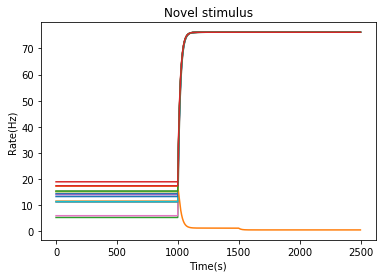

In [8]:
#Novel stimulus
t_max=2500
r=np.zeros((N,t_max))
tau=20
t_pre=1000
t_delay=1500
dt=1
I0=1
ita=np.random.normal(0,1,size=N)
I=I0*ita
def phi(xi):
    return r_m/(1+np.exp(-beta_T*(xi-h_0)))
for t in range(0,t_pre):
    r[:,t]=r0
for t in range(t_pre,t_delay):
    for i in range(N):
        xi=np.dot(J[i],r[:,t-1])-J[i,i]*r[i,t-1]
        r[i,t]=r[i,t-1]+(-r[i,t-1]+phi(I[i]+xi))/tau*dt #equation 1
    print("Time:"+str(t))
for t in range(t_delay,t_max):
    for i in range(N):
        xi=np.dot(J[i],r[:,t-1])-J[i,i]*r[i,t-1]
        r[i,t]=r[i,t-1]+(-r[i,t-1]+phi(xi))/tau*dt #equation 1
    print("Time:"+str(t))
plt.savefig('Figures/novel_stimulus.png')

In [ ]:
#Familiar Stimulus
I=I0*xi_pattern[0]
for t in range(0,t_pre):
    r[:,t]=r0
for t in range(t_pre,t_delay):
    for i in range(N):
        #xi=0
        #for j in range(N):
        #    if j!=i:
        #        xi=xi+J[i,j]*r[j,t-1]
        xi=np.dot(J[i],r[:,t-1])-J[i,i]*r[i,t-1]
        r[i,t]=r[i,t-1]+(-r[i,t-1]+phi(I[i]+xi))/tau*dt
    print("Time:"+str(t))
for t in range(t_delay,t_max):
    for i in range(N):
        #xi=0
        #for j in range(N):
        #    if j!=i:
        #        xi=xi+J[i,j]*r[j,t-1]
        xi=np.dot(J[i],r[:,t-1])-J[i,i]*r[i,t-1]
        r[i,t]=r[i,t-1]+(-r[i,t-1]+phi(xi))/tau*dt
    print("Time:"+str(t))
plt.figure()
for i in range(14):
    plt.plot(range(t_max),r[i])
plt.savefig('Figures/familiar_stimulus.png')

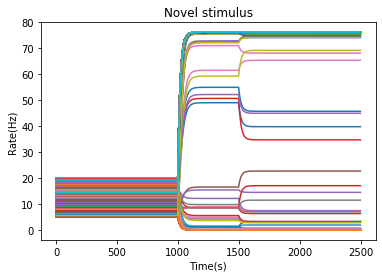

In [36]:
plt.figure()
plt.title('Novel stimulus')
plt.xlabel('Time(s)')
plt.ylabel('Rate(Hz)')
for i in range(5000):
    plt.plot(range(t_max),r[i])
plt.savefig('novel_stimulus2')